In [6]:
#import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#load data
train_url = 'https://raw.githubusercontent.com/hannserr/schulich_data_science/main/train_house.csv'

df = pd.read_csv(train_url)

In [8]:
#take a look at first 15 rows of train data set
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
#drop the id column as it is not necessary for modelling
df.drop(columns=['Id'], inplace=True)

df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [10]:
#look at info of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We can see that there are some columns that have data missing. Columns with more than 50% of the data missing will be dropped as filling the values will not be accurate for the analysis. This can also help with dimensionality reduction.

In [12]:
#list of columns to drop
columns_to_drop = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

#drop columns
df.drop(columns=columns_to_drop, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [13]:
#get some more information about the data set
df.describe(include = 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,1382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


The rest of the columns will be filled using various techniques as they are not missing more than 50% of the data. We can impute missing values in numerical columns with the mean and impute missing values in categorical columns with the mode. 

In [15]:
#impute missing values for numerical columns with mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

#impute missing values for categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [16]:
df.describe(include = 'all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1460.000000,1460.000000,1460,1460,1460,1460,1460,1460,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,4,4,2,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,925,1311,1459,1052,1382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,22.024023,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,60.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,70.049958,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,79.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


We can now see that all of the missing values have been filled, and the values such as mean, median have not been changed so much that analysis will be inaccurate.

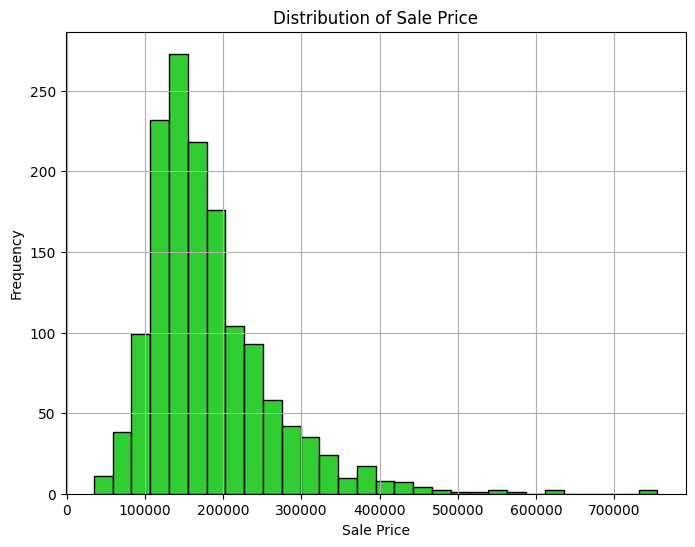

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [25]:
import matplotlib.pyplot as plt

# Plot histogram of SalePrice
plt.figure(figsize=(8, 6))
plt.hist(df['SalePrice'], bins=30, color='limegreen', edgecolor='black')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sale_price_stats = df['SalePrice'].describe()
print(sale_price_stats)

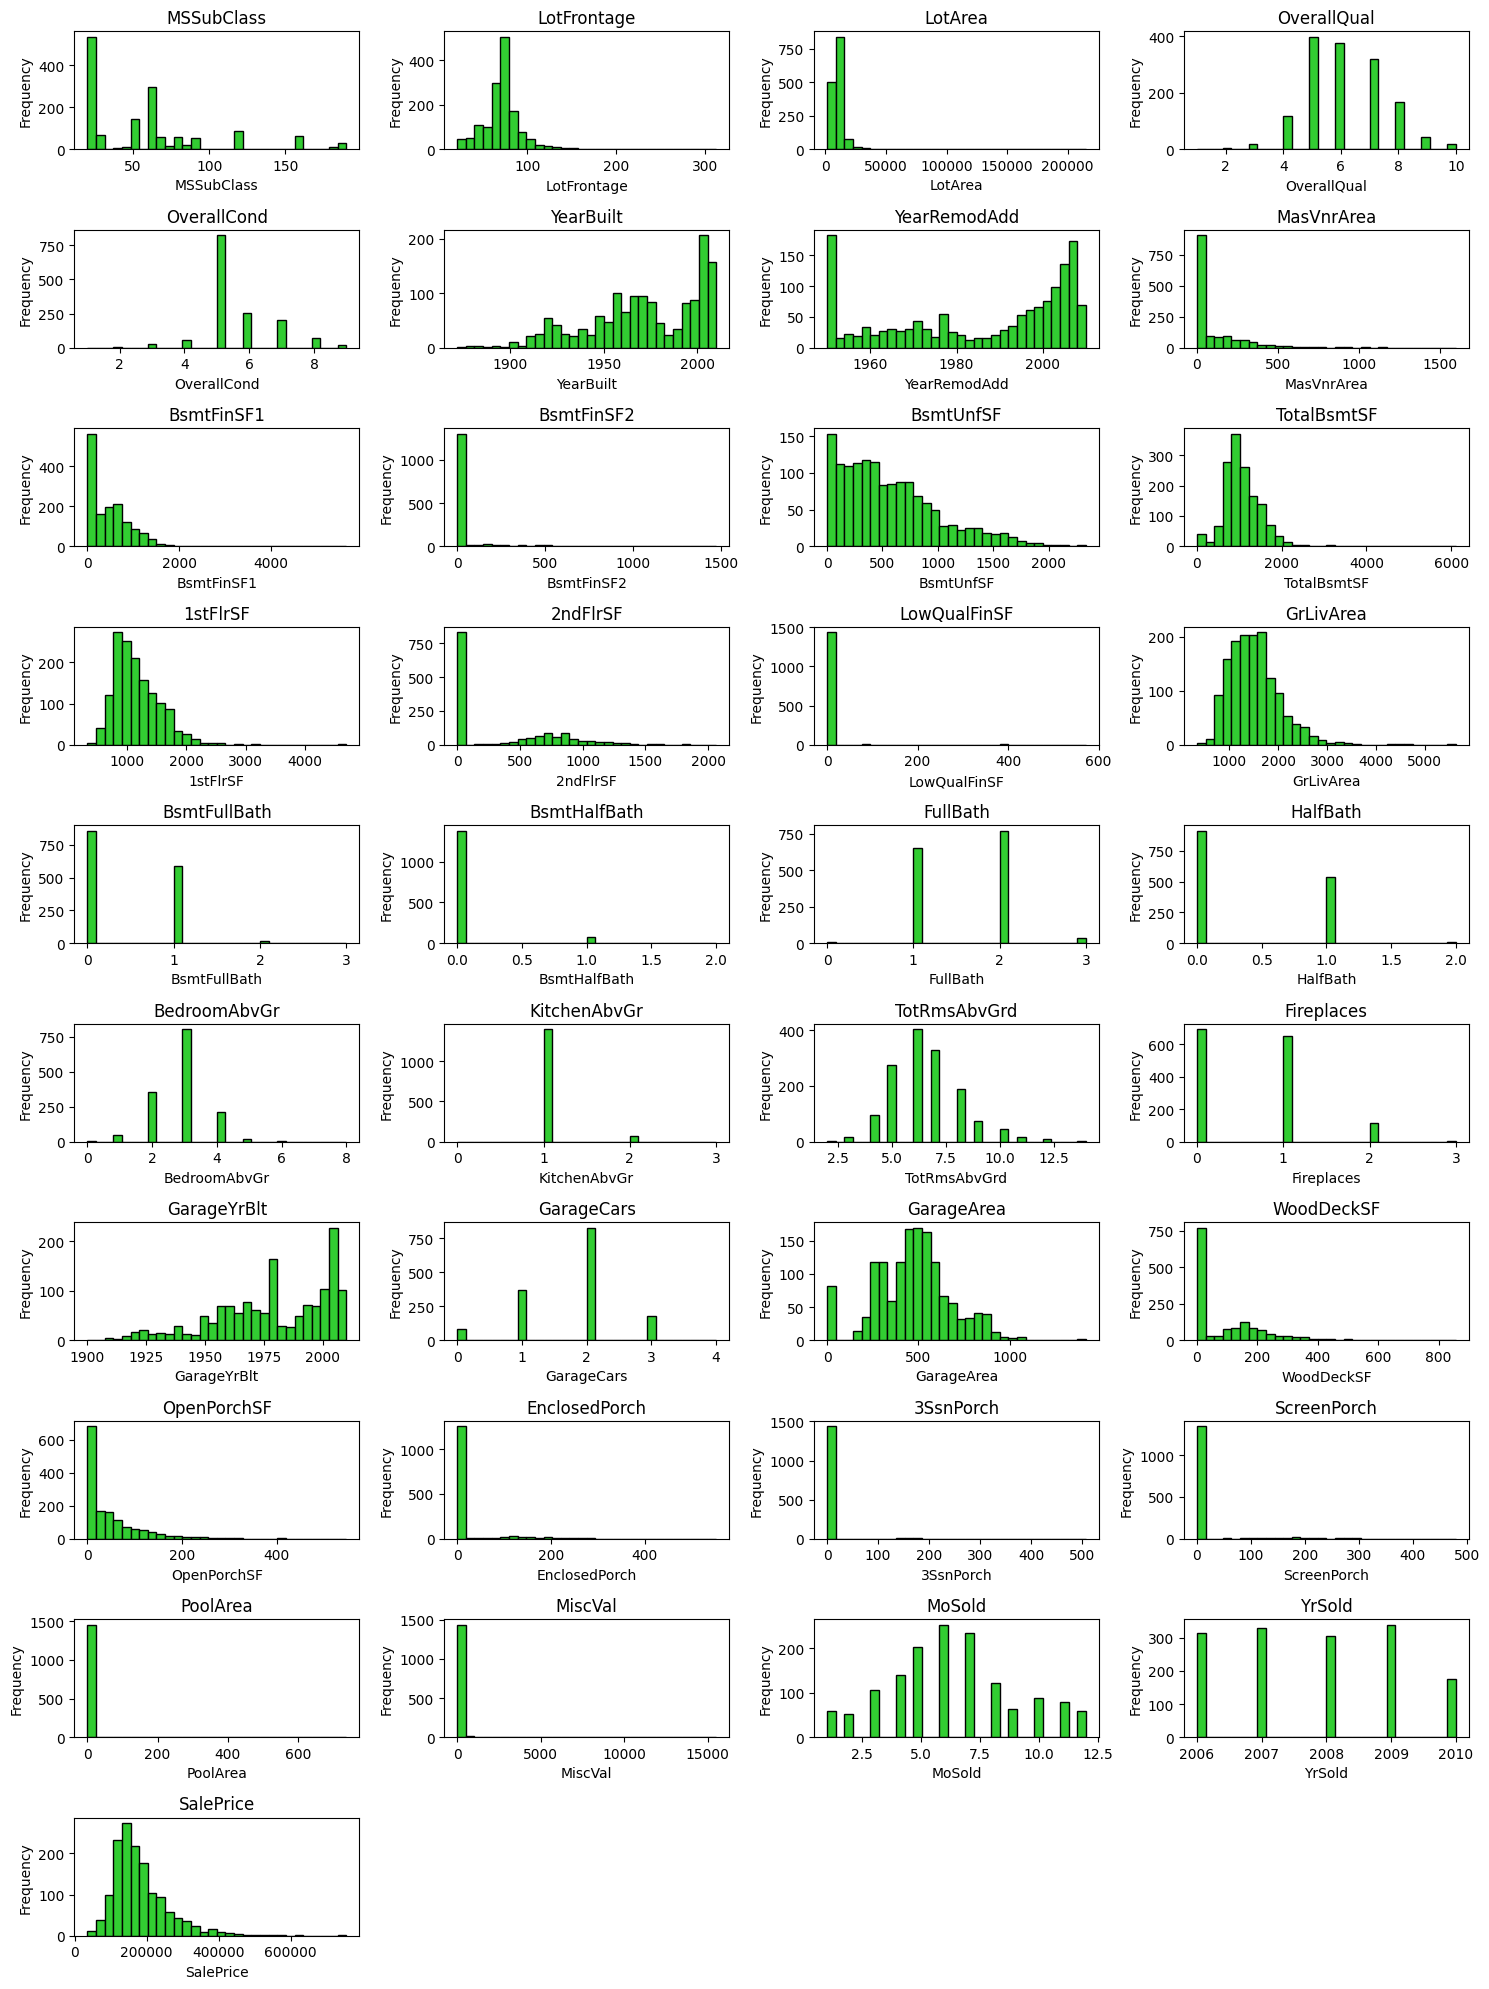

In [26]:
#get numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

#plot histograms for each numerical feature
plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(10, 4, i + 1)
    plt.hist(df[col], bins=30, color='limegreen', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

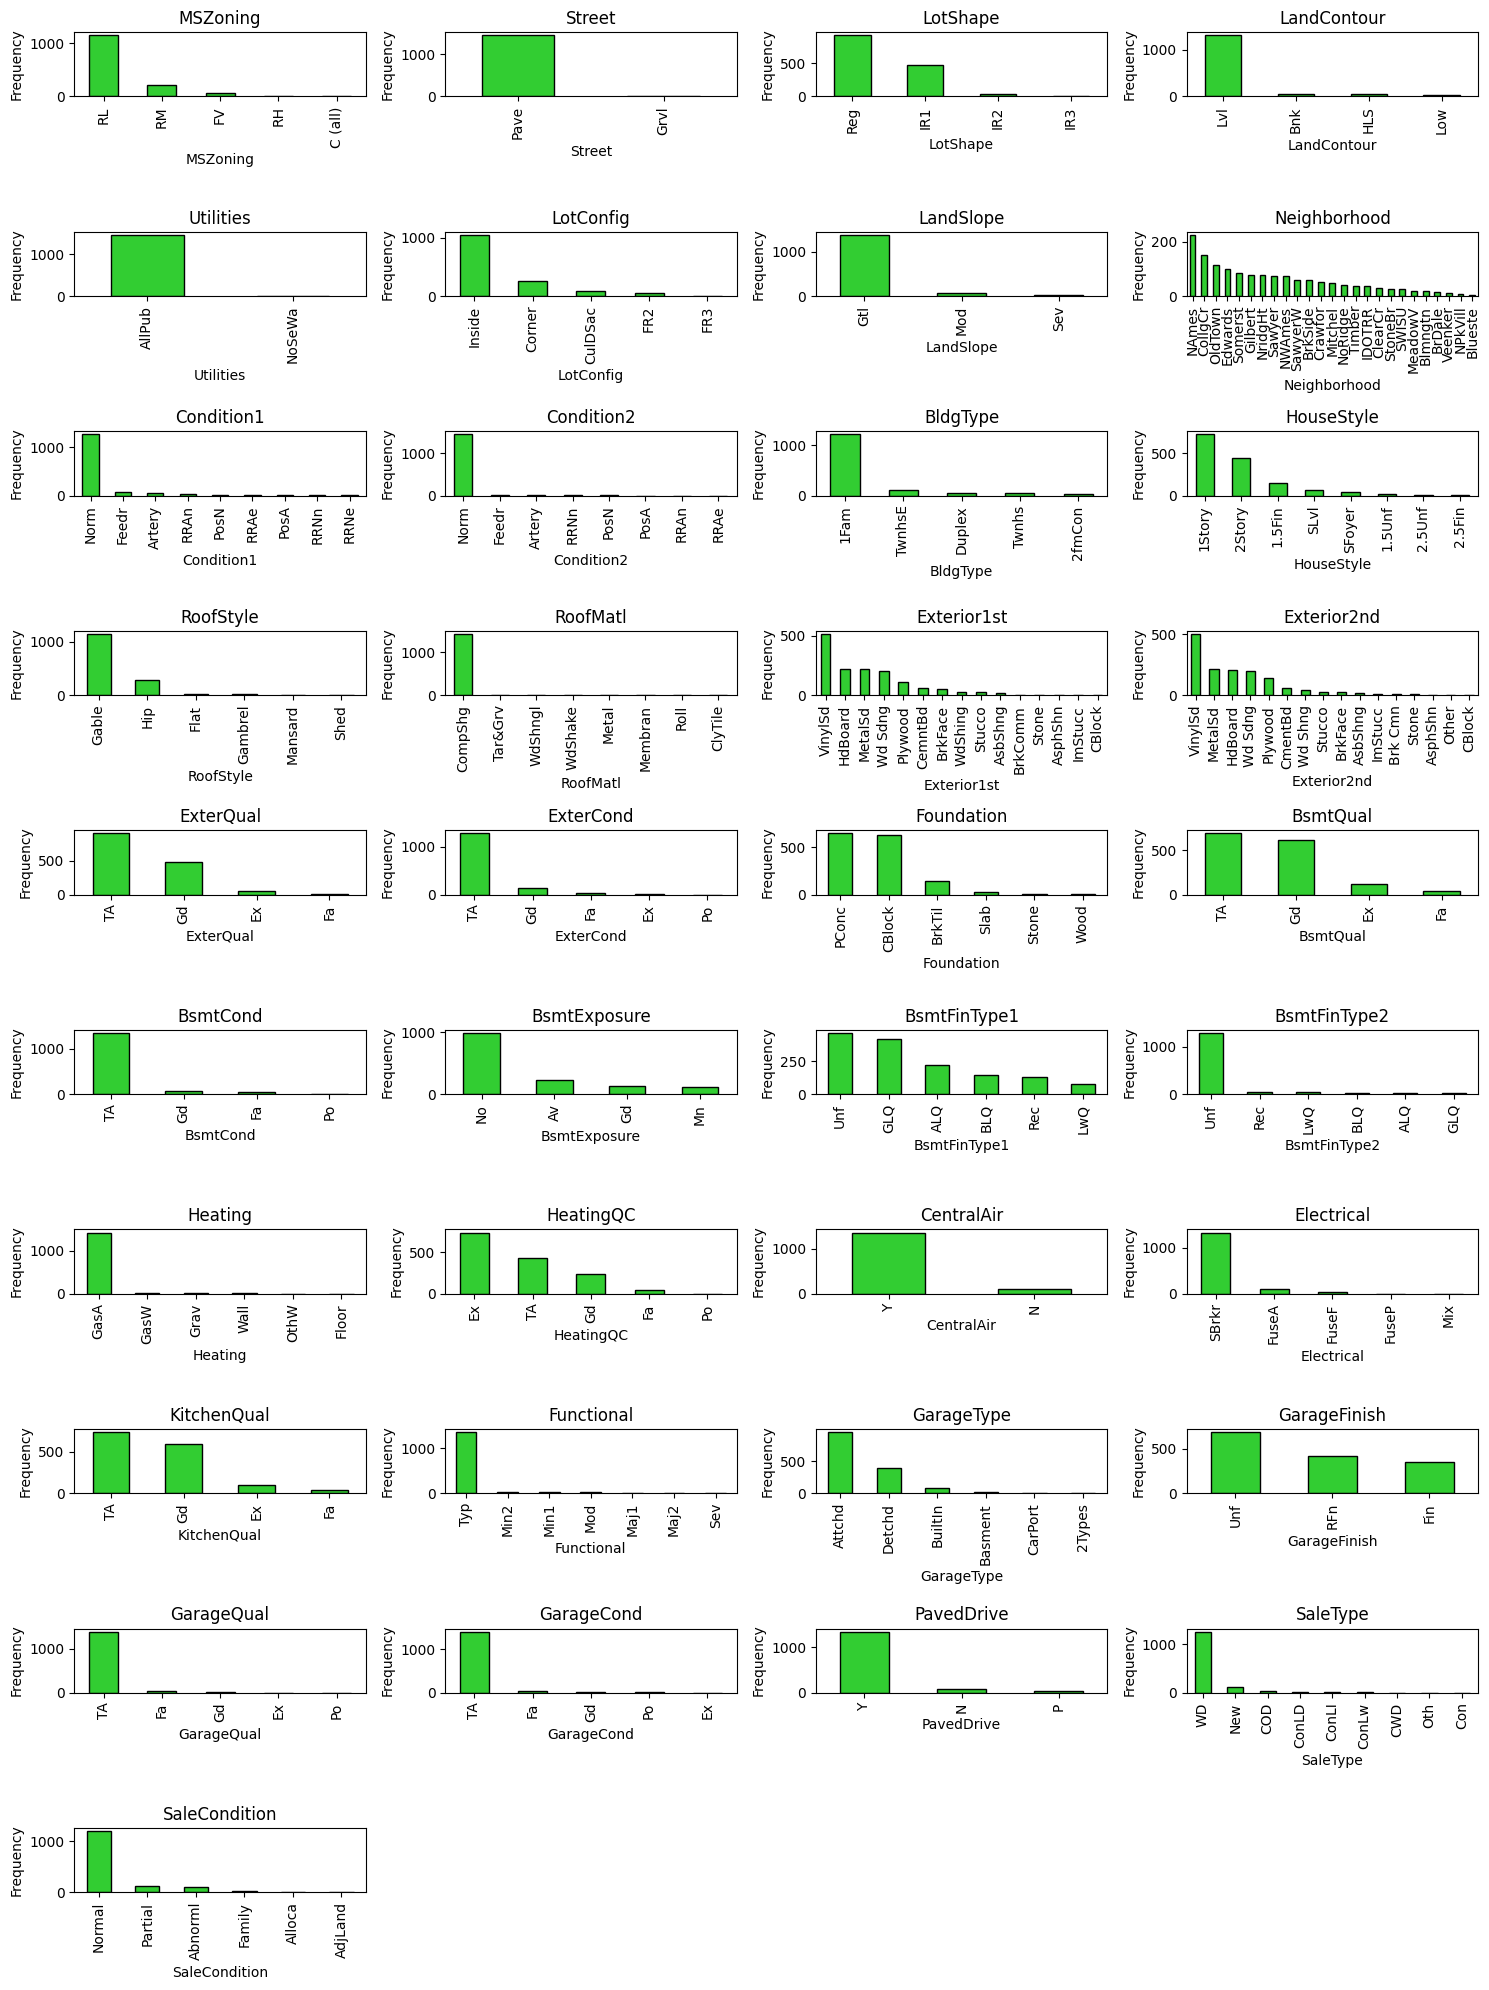

In [28]:
#get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

#plot bar plots for each categorical feature
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(10, 4, i + 1)
    df[col].value_counts().plot(kind='bar', color='limegreen', edgecolor='black')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix')

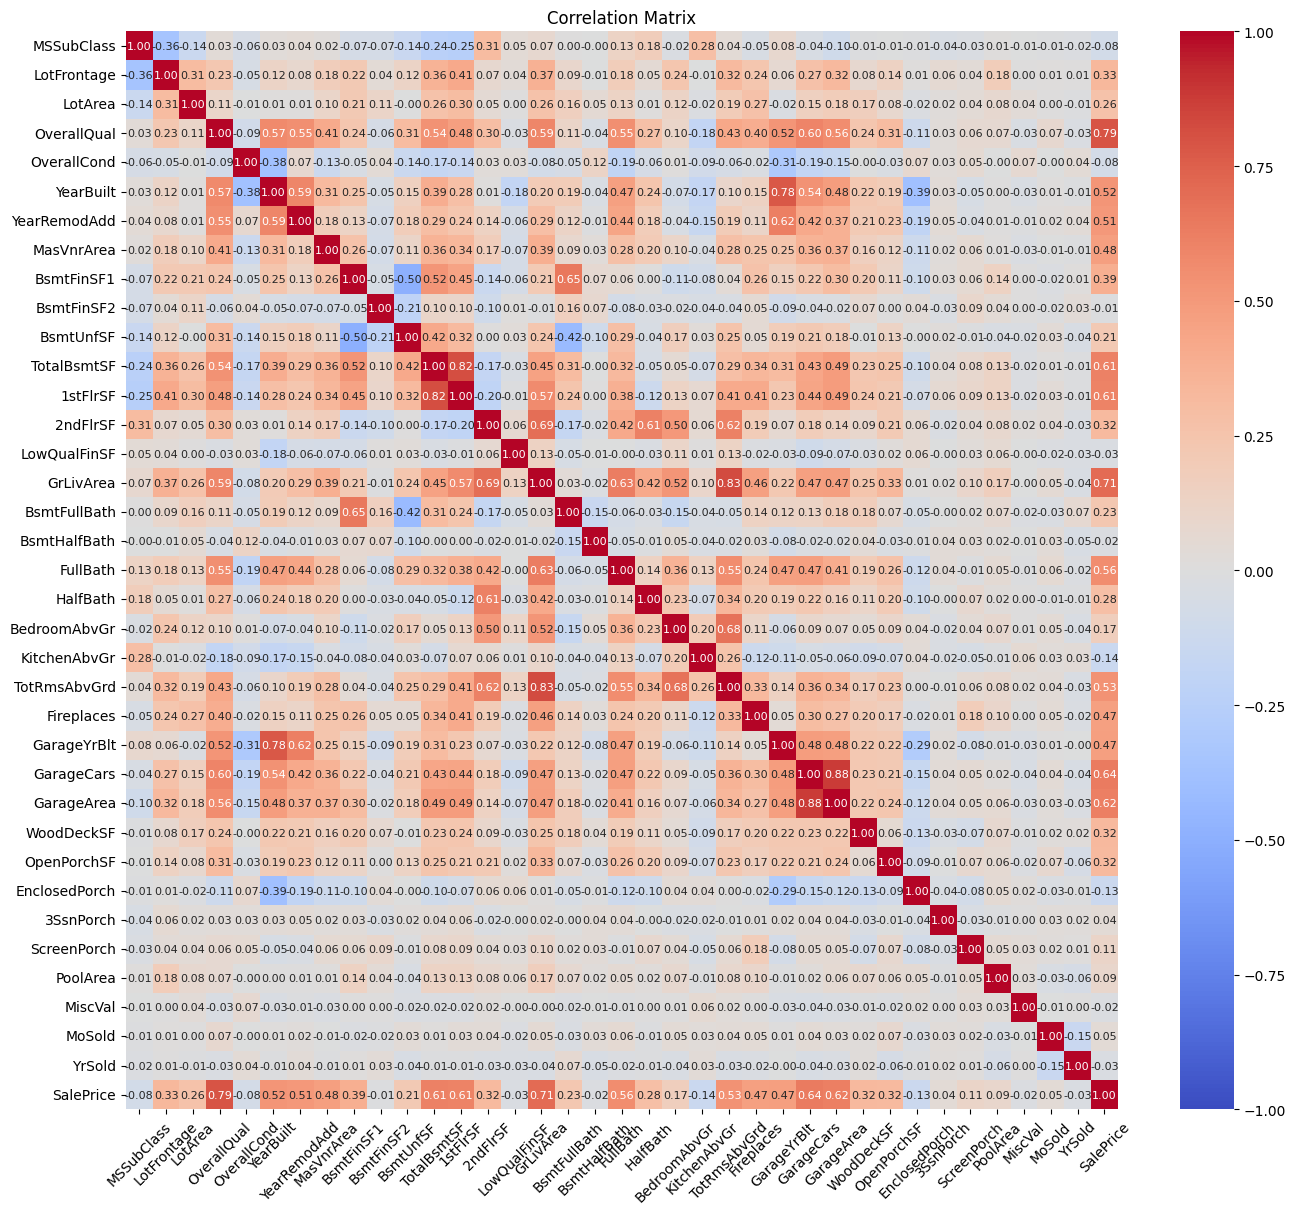

In [34]:
#calculate the correlation matrix
numerical_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numerical_columns].corr()

#sort the correlation matrix by 'SalePrice'
sorted_corr_matrix = correlation_matrix['SalePrice'].sort_values(ascending=False, key=abs)

#plot the correlation matrix using a heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', annot_kws={'size': 8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)

#split data into features (X) and target (y)
X = df_encoded.drop(columns=['SalePrice'])  
y = df_encoded['SalePrice']  

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#perform PCA
pca = PCA(n_components=0.99)  #keep 99% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#fit linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

#predictions
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#evaluate model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Train R2 Score: {r2_train}")
print(f"Test R2 Score: {r2_test}")


Train MSE: 460277767.7945408
Test MSE: 875051187.9652171
Train R2 Score: 0.9228311040249355
Test R2 Score: 0.8859173437571285


In [55]:
#extracting coefficients
coefficients = model.coef_

#extracting feature names
feature_names = X.columns

#printing coefficients with corresponding feature names
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")


MSSubClass: 14222.633770068129
LotFrontage: -105.36425014978022
LotArea: 12114.561588861141
OverallQual: -191.15006041367405
OverallCond: -2813.997836582259
YearBuilt: 3590.881287318005
YearRemodAdd: -4031.031875324673
MasVnrArea: 1290.3220580929271
BsmtFinSF1: -3381.405236786384
BsmtFinSF2: -3068.4677507622264
BsmtUnfSF: -1487.823856562357
TotalBsmtSF: -182.14220104114202
1stFlrSF: 576.145428743195
2ndFlrSF: -830.7729641220628
LowQualFinSF: -205.54238406476338
GrLivArea: 84.31112470030394
BsmtFullBath: -215.63080495053745
BsmtHalfBath: 674.4110014918688
FullBath: -2193.254754622018
HalfBath: 3074.848426276384
BedroomAbvGr: -1350.37771259322
KitchenAbvGr: 573.9682316574354
TotRmsAbvGrd: -2327.7890006516627
Fireplaces: -1543.8577568966207
GarageYrBlt: 643.4680091589564
GarageCars: 167.93828601706582
GarageArea: -2682.958751948681
WoodDeckSF: 2526.320135849125
OpenPorchSF: 837.4270235700532
EnclosedPorch: -2159.144628444934
3SsnPorch: -509.75554395008976
ScreenPorch: 4424.819369500192
Po

Top 10 features with the highest coefficients (positive impact on SalePrice):

RoofMatl_ClyTile: Each instance of Clay or Tile roofing material leads to an increase in SalePrice by approximately $4718.32. This suggests that properties with this type of roofing material command significantly higher prices.

ScreenPorch: Properties with a screen porch feature see a substantial increase in SalePrice by approximately $4424.82 for each instance.

HouseStyle_SFoyer: Each instance of a split foyer house style results in an increase in SalePrice by approximately $3444.99.

LotArea: Larger lot sizes lead to higher SalePrices, increasing by approximately $12114.56 for each unit increase in lot area.

WoodDeckSF: Each additional square foot of wood deck area leads to an increase in SalePrice by approximately $2526.32.

BsmtFinType2_ALQ: Properties with an additional living quarters in the basement (ALQ) see an increase in SalePrice by approximately $3566.12 for each instance.

MoSold: Each month increase in selling month results in an increase in SalePrice by approximately $4513.67.

OverallQual: Properties with higher overall quality have higher SalePrices, but each unit increase in quality leads to a decrease in SalePrice by approximately $191.15.

Foundation_Slab: Properties with a slab foundation see an increase in SalePrice by approximately $3719.76 for each instance.

BsmtExposure_No: Properties without basement exposure have higher SalePrices, increasing by approximately $6350.37 for each instance where there's no basement exposure.

Top 10 features with the lowest coefficients (negative impact on SalePrice):

RoofStyle_Shed: Properties with a shed roof style see a decrease in SalePrice by approximately $4585.55 for each instance.

ExterQual_Ex: Surprisingly, having excellent exterior quality leads to a decrease in SalePrice by approximately $3234.99 for each instance.

Neighborhood_MeadowV: Properties in the MeadowV neighborhood see a decrease in SalePrice by approximately $4184.77 for each instance.

ExterCond_TA: While typical external conditions usually lead to higher SalePrices, each unit increase in TA category results in a decrease in SalePrice by approximately $3432.67.

Foundation_BrkTil: Properties with a brick and tile foundation see a decrease in SalePrice by approximately $2952.36 for each instance.

BsmtFinType1_BLQ: Properties with a below average basement finish quality see a decrease in SalePrice by approximately $4470.62 for each instance.

LotConfig_FR3: Properties configured in a three-side frontage see a decrease in SalePrice by approximately $1863.90 for each instance.

Condition1_RRAn: Properties with adjacent to arterial streets see a decrease in SalePrice by approximately $3622.62 for each instance.

BsmtCond_Gd: Surprisingly, having good basement conditions leads to a decrease in SalePrice by approximately $4295.77 for each instance.

BldgType_2fmCon: Properties with a two-family conversion building type see a decrease in SalePrice by approximately $2886.63 for each instance.

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define models
models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

#define parameter grids for grid search
param_grids = {
    "Random Forest": {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "Gradient Boosting": {
        "n_estimators": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    }
}

#perform grid search and model selection
best_models = {}
for name, model in models.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters found for {name}: {grid_search.best_params_}")

#evaluate models on test set
print("\nEvaluating models on test set:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")

#choose best model based on performance
best_model_name = min(best_models, key=lambda x: mean_squared_error(y_test, best_models[x].predict(X_test)))
best_model = best_models[best_model_name]
print(f"\nBest model selected: {best_model_name}")


Performing grid search for Random Forest...
Best parameters found for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Performing grid search for Gradient Boosting...
Best parameters found for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

Evaluating models on test set:
Random Forest - Mean Squared Error: 815713820.3554144
Gradient Boosting - Mean Squared Error: 912088584.0607417

Best model selected: Random Forest


In [57]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

#support Vector Machines (SVM) Regression
svm_regressor = SVR()
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
svm_grid_search = GridSearchCV(svm_regressor, svm_param_grid, cv=5, scoring='neg_mean_squared_error')
svm_grid_search.fit(X_train, y_train)
svm_best_params = svm_grid_search.best_params_
svm_best_model = svm_grid_search.best_estimator_

#neural Network Regression
nn_regressor = MLPRegressor()
nn_param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}
nn_grid_search = GridSearchCV(nn_regressor, nn_param_grid, cv=5, scoring='neg_mean_squared_error')
nn_grid_search.fit(X_train, y_train)
nn_best_params = nn_grid_search.best_params_
nn_best_model = nn_grid_search.best_estimator_

#evaluate models on test set
svm_y_pred = svm_best_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)

nn_y_pred = nn_best_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)


C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

Support Vector Machines (SVM) - Mean Squared Error: 1469530642.0600607
Neural Network - Mean Squared Error: 1464742858.3178313


C:\Users\hanna\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
#evaluate Random Forest
rf_y_pred = best_models["Random Forest"].predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print("Random Forest - MSE:", rf_mse)
print("Random Forest - R2 Score:", rf_r2)

#evaluate Gradient Boosting
gb_y_pred = best_models["Gradient Boosting"].predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Gradient Boosting - MSE:", gb_mse)
print("Gradient Boosting - R2 Score:", gb_r2)

#evaluate SVM
svm_y_pred = svm_best_model.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print("SVM - MSE:", svm_mse)
print("SVM - R2 Score:", svm_r2)

#evaluate Neural Network
nn_y_pred = nn_best_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)

print("Neural Network - MSE:", nn_mse)
print("Neural Network - R2 Score:", nn_r2)


Random Forest - MSE: 815713820.3554144
Random Forest - R2 Score: 0.8936533077835611
Gradient Boosting - MSE: 912088584.0607417
Gradient Boosting - R2 Score: 0.8810886839198429
SVM - MSE: 1469530642.0600607
SVM - R2 Score: 0.8084135403937442
Neural Network - MSE: 1464742858.3178313
Neural Network - R2 Score: 0.8090377359772051


The Random Forest model has the lowest Mean Squared Error (MSE), lowest Mean Absolute Error (MAE), and highest R^2 Score, indicating better performance compared to the other models. Therefore, based on these metrics, the Random Forest model appears to be the best among the evaluated models.

In [63]:
#compare MSE and R2 score of linear model and best model
print(f"Linear Model MSE: {mse_test}")
print(f"Linear Model R2 Score: {r2_test}")
print("Random Forest MSE:", rf_mse)
print("Random Forest R2 Score:", rf_r2)

Linear Model MSE: 875051187.9652171
Linear Model R2 Score: 0.8859173437571285
Random Forest MSE: 815713820.3554144
Random Forest R2 Score: 0.8936533077835611


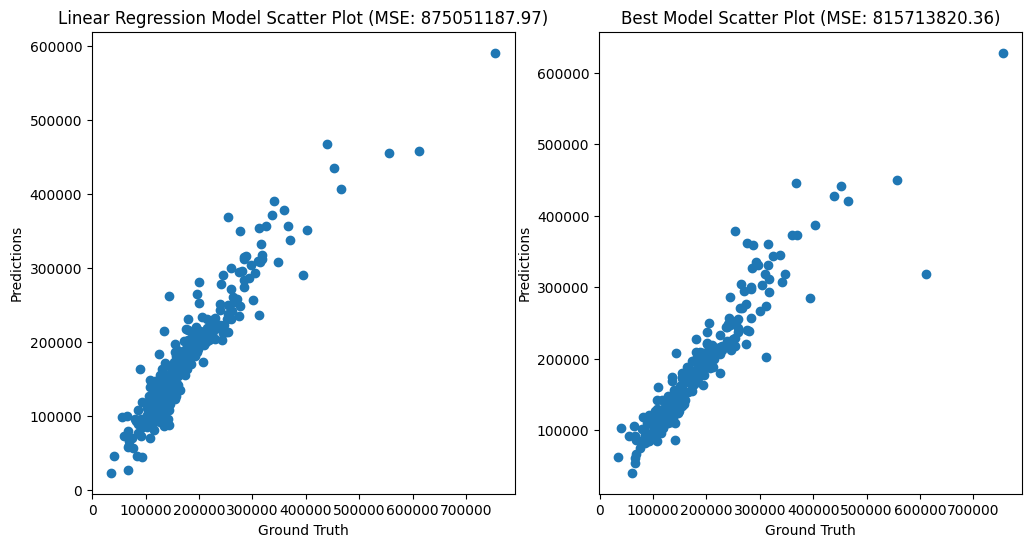

In [66]:
#scatter plots
plt.figure(figsize=(12, 6))

#linear Regression Model
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Linear Regression Model Scatter Plot (MSE: {:.2f})'.format(mse_test))

#best model (Random Forest) 
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Best Model Scatter Plot (MSE: {:.2f})'.format(rf_mse))

plt.show()



In [75]:
#fit Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

#fit Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#create DataFrame to store feature importances for Random Forest
rf_feature_df = pd.DataFrame({"Feature": X.columns, "Random Forest Importance": rf_model.feature_importances_})

#create DataFrame to store feature coefficients for Linear Regression model
linear_coefficient_df = pd.DataFrame({"Feature": X.columns, "Linear Coefficient": linear_model.coef_})

#merge DataFrames on 'Feature' column
feature_importance_df = pd.merge(rf_feature_df, linear_coefficient_df, on='Feature')


In [76]:
#display DataFrame by Random Forest importance
feature_importance_df.sort_values(by=['Random Forest Importance'], ascending=False)

,Feature,Random Forest Importance,Linear Coefficient
3,OverallQual,0.551812,6.519252e+03
15,GrLivArea,0.121882,3.311923e+01
11,TotalBsmtSF,0.038143,2.243240e+01
13,2ndFlrSF,0.031389,2.938274e+01
12,1stFlrSF,0.026196,1.077872e+01
...,...,...,...
98,Condition2_PosA,0.000000,8.067421e+04
52,Utilities_NoSeWa,0.000000,-1.057585e+04
124,RoofMatl_Membran,0.000000,1.018634e-10
216,Electrical_Mix,0.000000,1.309672e-10


In [77]:
#display DataFrame by Linear importance
feature_importance_df.sort_values(by=['Linear Coefficient'], ascending=False)

,Feature,Random Forest Importance,Linear Coefficient
125,RoofMatl_Metal,1.034827e-05,131070.880751
238,GarageQual_Ex,1.034967e-06,127808.305767
129,RoofMatl_WdShngl,6.673709e-05,97231.780157
126,RoofMatl_Roll,0.000000e+00,89827.937546
127,RoofMatl_Tar&Grv,4.312682e-05,89644.220759
...,...,...,...
137,Exterior1st_ImStucc,4.084396e-08,-58544.765736
100,Condition2_RRAe,1.305391e-06,-59926.919440
243,GarageCond_Ex,1.273414e-07,-118892.198499
99,Condition2_PosN,3.404728e-07,-196060.185575


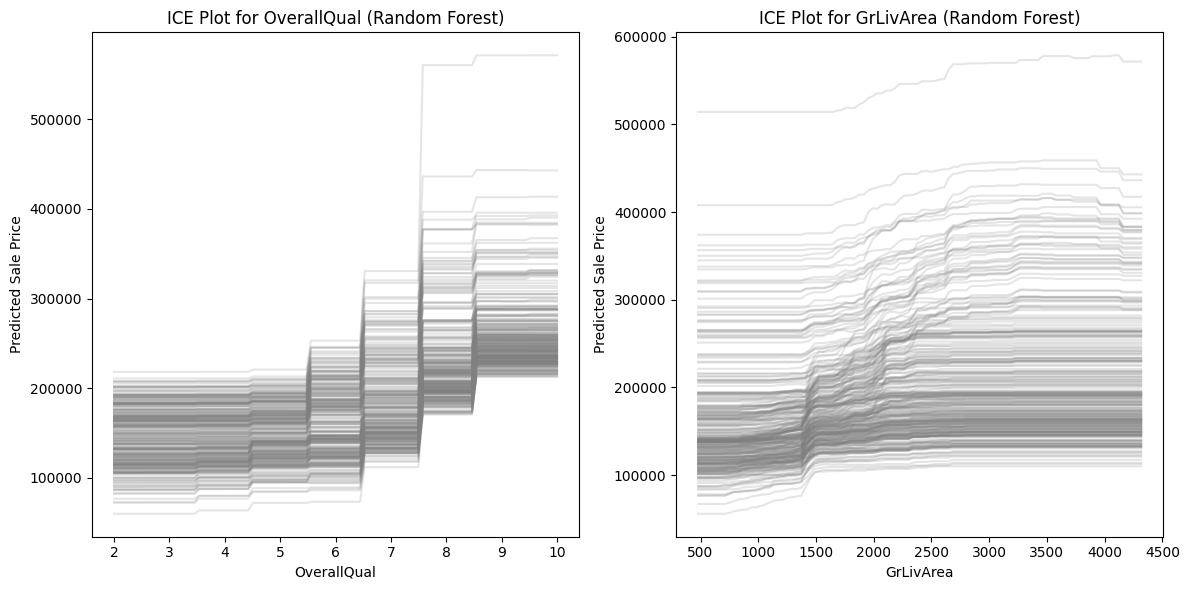

C:\Users\hanna\AppData\Local\Temp\ipykernel_16176\780517347.py:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(X_test[feature].min(), X_test[feature].max())  # Set limits based on actual feature values
C:\Users\hanna\AppData\Local\Temp\ipykernel_16176\780517347.py:41: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(X_test[feature].min(), X_test[feature].max())  # Set limits based on actual feature values


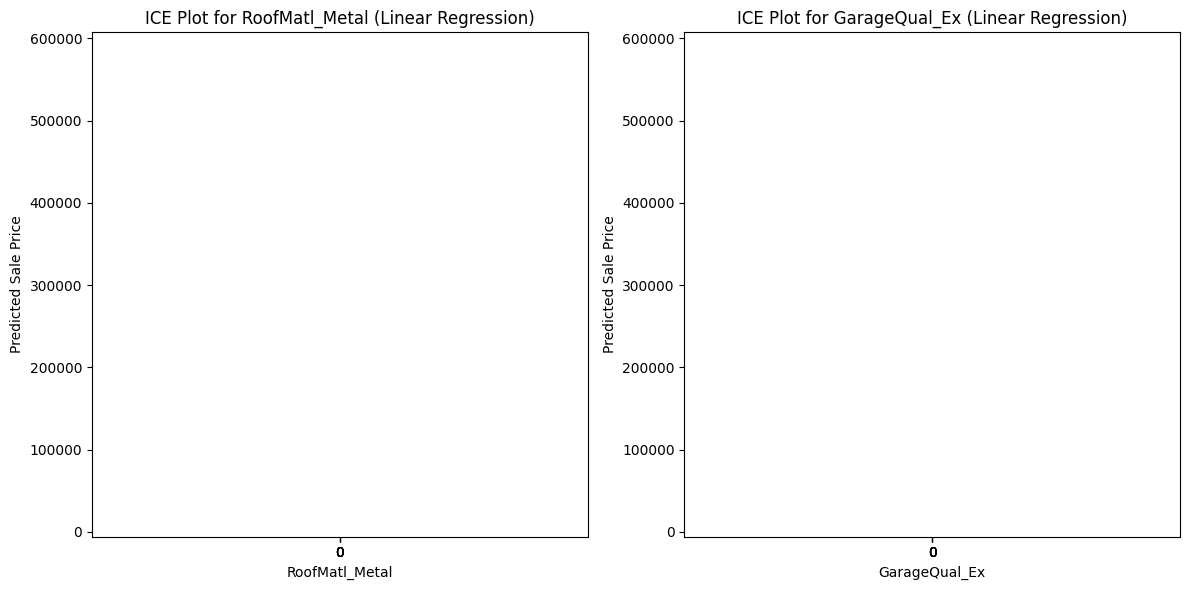

In [82]:
# Function to generate ICE plots
def generate_ice_plots(model, X, feature_name, num_samples=100):
    ice_values = []
    feature_values = np.linspace(X[feature_name].min(), X[feature_name].max(), num_samples)  # Create a grid of feature values
    for sample_idx in range(len(X)):
        ice_sample_values = []
        for val in feature_values:
            X_temp = X.iloc[sample_idx:sample_idx+1].copy()  # Select a single sample
            X_temp[feature_name] = val
            ice_sample_values.append(model.predict(X_temp))
        ice_values.append(ice_sample_values)
    return feature_values, np.array(ice_values)

# Set the most important features
rf_features = ['OverallQual', 'GrLivArea']
linear_features = ['RoofMatl_Metal', 'GarageQual_Ex']

# Generate ICE plots for Random Forest model
plt.figure(figsize=(12, 6))
for i, feature in enumerate(rf_features):
    plt.subplot(1, 2, i+1)
    feature_values, ice_values = generate_ice_plots(rf_model, X_test, feature)
    for ice_sample in ice_values:
        plt.plot(feature_values, ice_sample, color='grey', alpha=0.2)
    plt.xlabel(feature)
    plt.ylabel('Predicted Sale Price')
    plt.title(f'ICE Plot for {feature} (Random Forest)')

plt.tight_layout()
plt.show()

# Generate ICE plots for Linear Regression model
plt.figure(figsize=(12, 6))
for i, feature in enumerate(linear_features):
    plt.subplot(1, 2, i+1)
    feature_values, ice_values = generate_ice_plots(linear_model, X_test, feature)
    for ice_sample in ice_values:
        plt.plot(feature_values, ice_sample, color='grey', alpha=0.2)
    
    # Adjust x-axis limits and ticks
    plt.xlim(X_test[feature].min(), X_test[feature].max())  # Set limits based on actual feature values
    plt.xticks(np.linspace(X_test[feature].min(), X_test[feature].max(), num=5))  # Set ticks at appropriate intervals
    
    plt.xlabel(feature)
    plt.ylabel('Predicted Sale Price')
    plt.title(f'ICE Plot for {feature} (Linear Regression)')

plt.tight_layout()
plt.show()

In [83]:
# Generate ICE plots for Linear Regression model
plt.figure(figsize=(12, 6))
for i, feature in enumerate(linear_features):
    plt.subplot(1, 2, i+1)
    feature_values, ice_values = generate_ice_plots(linear_model, X_test, feature)
    print("Feature Values:", feature_values)
    print("ICE Values:", ice_values)
    for ice_sample in ice_values:
        plt.plot(feature_values, ice_sample, color='grey', alpha=0.2)
    
    # Adjust x-axis limits and ticks
    plt.xlim(X_test[feature].min(), X_test[feature].max())  # Set limits based on actual feature values
    plt.xticks(np.linspace(X_test[feature].min(), X_test[feature].max(), num=5))  # Set ticks at appropriate intervals
    
    plt.xlabel(feature)
    plt.ylabel('Predicted Sale Price')
    plt.title(f'ICE Plot for {feature} (Linear Regression)')

plt.tight_layout()
plt.show()